In [53]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.graph_objects as go
import json

# Worldwide wildfire choropleth animated map

In [54]:
# Load csv file for wildfire data
wildfires = Path("Resources/2- annual-area-burnt-by-wildfires.csv")
wildfire_df = pd.read_csv(wildfires)

wildfire_df.head()
wildfire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Entity                          3354 non-null   object
 1   Code                            3276 non-null   object
 2   Year                            3354 non-null   int64 
 3   Annual area burnt by wildfires  3354 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 104.9+ KB


In [55]:
# Rename columns
wildfire_df = wildfire_df.rename(columns = {
    "Entity" : "Country", 
    "Code" : 'Alpha-3 code', 
    "Annual area burnt by wildfires" : "Acres Burned"
})

wildfire_df.head()

,Country,Alpha-3 code,Year,Acres Burned
0,Afghanistan,AFG,2012,10430
1,Afghanistan,AFG,2013,5892
2,Afghanistan,AFG,2014,5134
3,Afghanistan,AFG,2015,4084
4,Afghanistan,AFG,2016,9681


In [56]:
# Drop null values
wildfire_df.dropna(inplace=True)
wildfire_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3276 entries, 0 to 3353
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       3276 non-null   object
 1   Alpha-3 code  3276 non-null   object
 2   Year          3276 non-null   int64 
 3   Acres Burned  3276 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 128.0+ KB


In [57]:
# Separate DF by year
df_2012 = wildfire_df[wildfire_df["Year"] ==2012]
df_2013 = wildfire_df[wildfire_df["Year"] ==2013]
df_2014 = wildfire_df[wildfire_df["Year"] ==2014]
df_2015 = wildfire_df[wildfire_df["Year"] ==2015]
df_2016 = wildfire_df[wildfire_df["Year"] ==2016]
df_2017 = wildfire_df[wildfire_df["Year"] ==2017]
df_2018 = wildfire_df[wildfire_df["Year"] ==2018]
df_2019 = wildfire_df[wildfire_df["Year"] ==2019]
df_2020 = wildfire_df[wildfire_df["Year"] ==2020]
df_2021 = wildfire_df[wildfire_df["Year"] ==2021]
df_2022 = wildfire_df[wildfire_df["Year"] ==2022]
df_2023 = wildfire_df[wildfire_df["Year"] ==2023]

In [58]:
# Import geographic data csv
coords = Path("Resources/countries_codes_and_coordinates.csv")
coordinates_df = gpd.read_file(coords)

coordinates_df.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),geometry
0,Afghanistan,AF,AFG,4,33,65,None
1,Åland Islands,AX,ALA,248,60.116667,19.9,None
2,Albania,AL,ALB,8,41,20,None
3,Algeria,DZ,DZA,12,28,3,None
4,American Samoa,AS,ASM,16,-14.3333,-170,None


In [59]:
coordinates_df.columns

Index(['Country', 'Alpha-2 code', 'Alpha-3 code', 'Numeric code',
       'Latitude (average)', 'Longitude (average)', 'geometry'],
      dtype='object')

In [60]:
# Keep only necessary columns
coordinates_df = coordinates_df[['Country', 'Alpha-3 code', 'Numeric code',
       'Latitude (average)', 'Longitude (average)', 'geometry']]

coordinates_df.head()

,Country,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),geometry
0,Afghanistan,AFG,4,33,65,None
1,Åland Islands,ALA,248,60.116667,19.9,None
2,Albania,ALB,8,41,20,None
3,Algeria,DZA,12,28,3,None
4,American Samoa,ASM,16,-14.3333,-170,None


In [61]:
# Strip whitespace
coordinates_df = coordinates_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
coordinates_df.head()

,Country,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),geometry
0,Afghanistan,AFG,4,33,65,None
1,Åland Islands,ALA,248,60.116667,19.9,None
2,Albania,ALB,8,41,20,None
3,Algeria,DZA,12,28,3,None
4,American Samoa,ASM,16,-14.3333,-170,None


In [62]:
# Merge each year DF with geographic data
merged_2012 = pd.merge(df_2012, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2013 = pd.merge(df_2013, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2014 = pd.merge(df_2014, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2015 = pd.merge(df_2015, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2016 = pd.merge(df_2016, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2017 = pd.merge(df_2017, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2018 = pd.merge(df_2018, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2019 = pd.merge(df_2019, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2020 = pd.merge(df_2020, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2021 = pd.merge(df_2021, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2022 = pd.merge(df_2022, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2023 = pd.merge(df_2023, coordinates_df, how = "inner", on = ['Country', "Alpha-3 code"])
merged_2012.head()

,Country,Alpha-3 code,Year,Acres Burned,Numeric code,Latitude (average),Longitude (average),geometry
0,Afghanistan,AFG,2012,10430,4,33,65,None
1,Albania,ALB,2012,176838,8,41,20,None
2,Algeria,DZA,2012,631108,12,28,3,None
3,American Samoa,ASM,2012,0,16,-14.3333,-170,None
4,Andorra,AND,2012,0,20,42.5,1.6,None


In [63]:
# Append each year DF to one DF to graph
new_fires = pd.concat([merged_2013, merged_2014, merged_2015, merged_2016, merged_2017, merged_2018, merged_2019, merged_2020, merged_2021, merged_2022, merged_2023], ignore_index = True)

In [64]:
new_fires.to_csv('resources/new_fires.csv')

In [65]:
# Create Choropleth Map with Alpha-3 Code, slider bar is animated by Year
fig = px.choropleth(
    new_fires,
    geojson=coordinates_df['Alpha-3 code'],
    locations='Alpha-3 code',
    color='Acres Burned',
    animation_frame='Year', 
    color_continuous_scale= px.colors.sequential.Reds,
    title='Area Burnt by Wildfires over Time', 
    height = 400, 
    width = 600
)
fig.update_geos(fitbounds="locations", visible=False) 
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10000

# Export to HTML for project
fig.write_html("html/wildfiredata.html")
fig.show()

In [66]:
# Create Choropleth Map with Alpha-3 Code, slider bar is animated by Year
fig = px.choropleth(
    new_fires,
    geojson=coordinates_df['Alpha-3 code'],
    locations='Alpha-3 code',
    color='Acres Burned',
    animation_frame='Year', 
    color_continuous_scale= px.colors.sequential.Reds,
    title='Area Burnt by Wildfires over Time', 
    height = 800, 
    width = 2200
)
fig.update_geos(fitbounds="locations", visible=False) 
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10000

# Export to HTML for project
fig.write_html("html/large_wildfiredata.html")
fig.show()

In [67]:
# Filter the top 10 countries based on total acres burned
total_acres_burned = new_fires.groupby('Country')['Acres Burned'].sum().sort_values(ascending=False)

# Get the top 10 countries by total acres burned
top_10_countries = total_acres_burned.head(10).index

In [68]:
# Filter the data to include only the top 10 countries
top_10_data = new_fires[new_fires['Country'].isin(top_10_countries)]


In [69]:
# Aggregate the data by country and year (sum of acres burned)
pivot_data = top_10_data.groupby(['Country', 'Year'])['Acres Burned'].sum().reset_index()

# Pivot the data to create a matrix of 'Country' vs. 'Year' with 'Acres Burned' as values
heatmap_data = pivot_data.pivot(index='Country', columns='Year', values='Acres Burned')

# Sort the rows in descending order by total acres burned
heatmap_data = heatmap_data.loc[total_acres_burned.head(10).index]

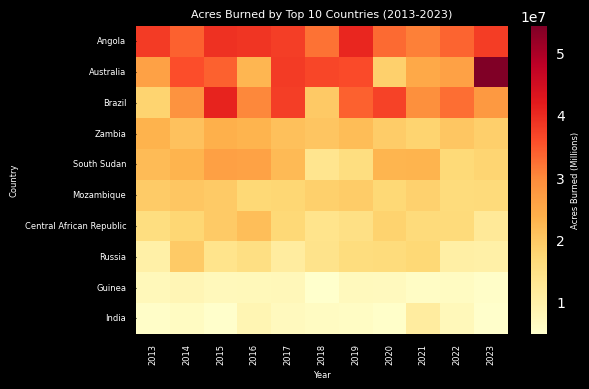

In [70]:
# Set up the plot size and style
plt.figure(figsize=(6, 4))

# Set figure background to black
plt.gcf().set_facecolor('black')  
plt.gca().set_facecolor('black')

# Create the heatmap
heatmap = sns.heatmap(heatmap_data, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Acres Burned (Millions)'}, color = 'white')

# Set plot labels
plt.title('Acres Burned by Top 10 Countries (2013-2023)', fontsize=8, color='white')
plt.xlabel('Year', fontsize=6, color='white')
plt.ylabel('Country', fontsize=6, color='white')


# Change color bar label to white
colorbar = plt.gca().collections[0].colorbar  # Get the colorbar
colorbar.set_label('Acres Burned (Millions)', fontsize=6, color='white')  # Set colorbar label to white
colorbar.ax.tick_params(labelcolor='white')  # Set color of colorbar ticks to white

# Formatting axes
plt.xticks(fontsize=6, color='white')
plt.yticks(fontsize=6, color='white')

# Show the plot
plt.savefig('html/fire_heatmap.png')
plt.show()


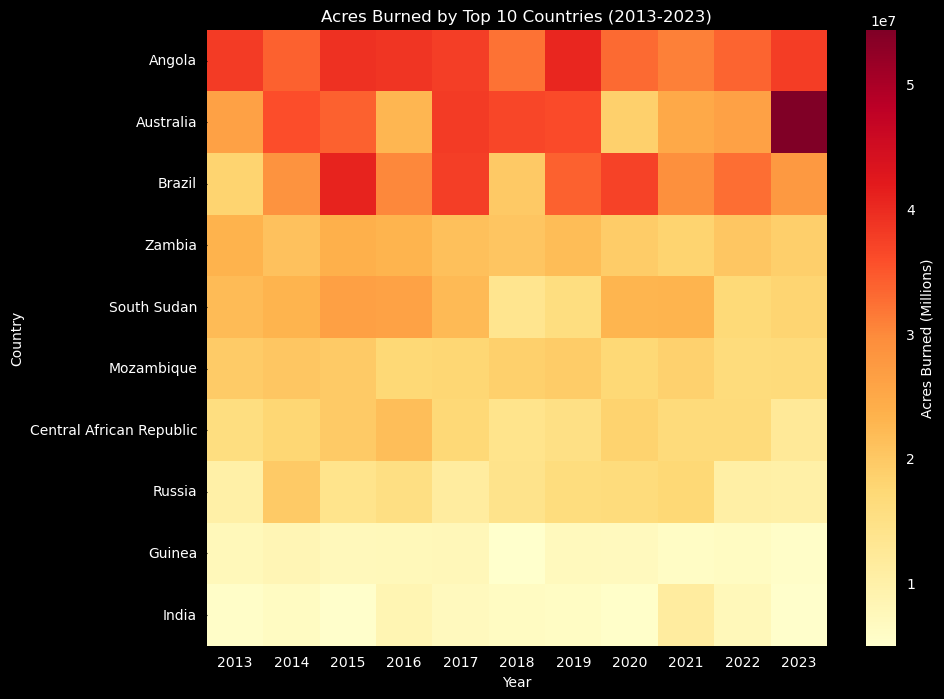

In [71]:
#Make same plot as above, only bigger for presentation

# Set up the plot size and style
plt.figure(figsize=(10, 8))

# Set figure background to black
plt.gcf().set_facecolor('black')  
plt.gca().set_facecolor('black')

# Create the heatmap
heatmap = sns.heatmap(heatmap_data, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Acres Burned (Millions)'}, color = 'white')

# Set plot labels
plt.title('Acres Burned by Top 10 Countries (2013-2023)', fontsize=12, color='white')
plt.xlabel('Year', fontsize=10, color='white')
plt.ylabel('Country', fontsize=10, color='white')


# Change color bar label to white
colorbar = plt.gca().collections[0].colorbar  # Get the colorbar
colorbar.set_label('Acres Burned (Millions)', fontsize=10, color='white')  # Set colorbar label to white
colorbar.ax.tick_params(labelcolor='white')  # Set color of colorbar ticks to white

# Formatting axes
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

# Show the plot
plt.savefig('html/fire_heatmap_large.png')
plt.show()
